In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.models import Model, load_model
from skimage.io import imread, imshow, imsave


In [2]:
# load model
model = load_model("static/models/model_unet_checkpoint-good-2020-Jan-1.h5")
model.layers[0].input_shape #(None, 160, 160, 3)

[(None, 128, 128, 3)]

In [3]:
img_path = 'static/img/ade080c6618cbbb0a25680cf847f312b5e19b22bfe1cafec0436987ebe5b1e7e.png' 

In [18]:
#open image with skimage.io package 
new_image = imread(img_path)[:,:,:3]  # read only three channels
print(new_image.shape)

(520, 696, 3)


In [19]:
orig_shape = new_image.shape[:-1]
orig_shape

(520, 696)

In [20]:
new_image = tf.image.resize(new_image, (128, 128))
print(new_image.shape)

(128, 128, 3)


In [21]:
image_holder = np.zeros((1, 128, 128, 3), dtype=np.uint8) 
image_holder[0] = new_image
print(image_holder[0].shape)

(128, 128, 3)


TensorShape([128, 128])

In [22]:
pred_img = model.predict(image_holder)
pred_img[0] = (pred_img[0] > 0.5).astype(np.uint8)

(128, 128, 1)


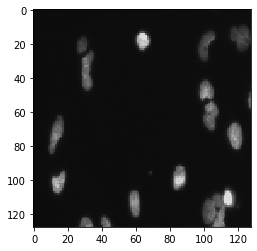

In [23]:
print(pred_img[0].shape)
plt.imshow(image_holder[0])
plt.show()

In [26]:
#plt.hist(pred_img[0].ravel(), 3) 
#plt.show()

In [40]:
pred_image_upsized = tf.image.resize(pred_img[0], orig_shape)
print(pred_image_upsized.shape)

(520, 696, 1)


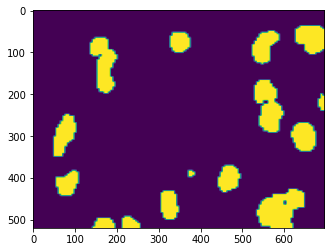

In [41]:
pred_image_upsized_sq = np.squeeze(pred_image_upsized)
plt.imshow(pred_image_upsized_sq)
plt.show()

In [42]:
pred_img_sq = np.squeeze(pred_img[0])
print(pred_img_sq.shape)

(128, 128)


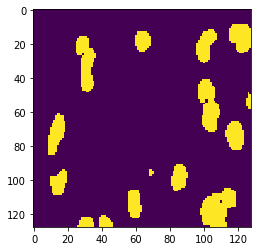

In [43]:
plt.imshow(pred_img_sq)
plt.show()

In [38]:
#plt.hist(pred_img_sq.ravel(),3)
#plt.show()

In [44]:
pred_img_fname = 'predicted_image'
pred_img_filepath =  'static/img/' + pred_img_fname + '.png'
imsave(pred_img_filepath, pred_image_upsized_sq*255)

Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


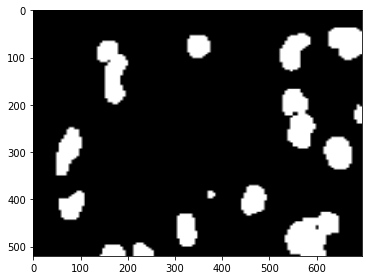

In [45]:
read_bk = imread(pred_img_filepath)

#plt.hist(read_bk.ravel(), 3)
#plt.show() 
#print(read_bk)
imshow(np.squeeze(read_bk))
plt.show()

In [114]:
for i in range(0,127):
    for j in range(0,127):
        if read_bk[i,j] != pred_img_sq[i,j]*255:
            print("Unmatch in %s, %s", i , j )
            print(read_bk[i,j])
            print(pred_img_sq[i,j])

        